# Figures for FEED-behav project

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Within-subject analysis
How well can we predict individual subjects' ratings (anger vs. sadness vs. happiness, etc.) based on different sources of information ("feature sets"). We compare:

- Pixel-based decomposition methods (NMF & PCA)
- Action unit configurations ("raw" and with interactions, `AUxAU`)
- Subjective trait judgements (`SJ`; attractiveness, dominance, etc.)
- Combination of AU + SJ
- Circumplex space (arousal + valence)

Dots represent individual (subject-wise) cross-validated AUC scores (chance = 0.5), dashed (-.) line represent the (pseudo) subject-average noise ceiling: the best performance a classifier can achieve given the inconsistencies in the ratings.

In [4]:
# plot params
sns.set(font_scale=2)
sns.set_style('ticks')
ymin = -.1
ymax = .9
chance_level = 0.

In [11]:
# Other params
rename = {
    'pixelPCA_frame-01': r'$pPCA_{0}$',
    'pixelPCA_frame-15': r'$pPCA_{\max}$',
    'pixelPCA_frame-15min01': r'$pPCA_{\delta}$',
    'pixelPCA_frame-01+pixelPCA_frame-15': r'$pPCA_{+\!\!\!+}$',
    'pixelPCA_frame-01+pixelPCA_frame-15min01': r'$pPCA_{+\delta}$',
    #
    'vertexPCA_frame-01': r'$vPCA_{0}$',
    'vertexPCA_frame-15': r'$vPCA_{\max}$',
    'vertexPCA_frame-15min01': r'$vPCA_{\delta}$',
    'vertexPCA_frame-01+vertexPCA_frame-15': r'$vPCA_{+\!\!\!+}$',
    'vertexPCA_frame-01+vertexPCA_frame15min01': r'$vPCA_{+\delta}$',
    #
    'lm_frame-01': r'$lm_{0}$',
    'lm_frame-15': r'$lm_{\max}$',
    'lm_frame-15min01': r'$lm_{\delta}$',
    'lm_frame-01+lm_frame-15': r'$lm_{+\!\!\!+}$',
    'lm_frame-01+lm_frame-15min01': r'$lm_{+\delta}$',
    #
    'lmPCA_frame-01': r'$lmPCA_{0}$',
    'lmPCA_frame-15': r'$lmPCA_{\max}$',
    'lmPCA_frame-15min01': r'$lmPCA_{\delta}$',
    'lmPCA_frame-01+lmPCA_frame-15': r'$lmPCA_{+\!\!\!+}$',
    'lmPCA_frame-01+lmPCA_frame-15min01': r'$lmPCA_{+\delta}$',
    #
    'lmdist_frame-01': r'$lmdist_{0}$',
    'lmdist_frame-15': r'$lmdist_{\max}$',
    'lmdist_frame-15min01': r'$lmdist_{\delta}$',
    'lmdist_frame-01+lmdist_frame-15': r'$lmdist_{+\!\!\!+}$',
    'lmdist_frame-01+lmdist_frame-15min01': r'$lmdist_{+\delta}$',
    #
    'lmdistPCA_frame-01': r'$lmdistPCA_{0}$',
    'lmdistPCA_frame-15': r'$lmdistPCA_{\max}$',
    'lmdistPCA_frame-15min01': r'$lmdistPCA_{\delta}$',
    'lmdistPCA_frame-01+lmdistPCA_frame-15': r'$lmdistPCA_{+\!\!\!+}$'
}
order_fs = [
    'AU',
    'AUxAU',
    'SJ',
    'AU+SJ',
    r'$pPCA_{0}$',
    #r'$pPCA_{\max}$',
    r'$pPCA_{\delta}$',
    #r'$pPCA_{+\!\!\!+}$',
    r'$pPCA_{+\delta}$',
    #r'$vPCA_{0}$',
    #r'$vPCA_{\max}$',
    #r'$vPCA_{\delta}$',
    #r'$vPCA_{+\!\!\!+}$',
    #r'$lm_{0}$',
    #r'$lm_{\max}$',
    #r'$lm_{\delta}$',
    #r'$lm_{+\!\!\!+}$',
    #r'$lm_{+\delta}$',
    #r'$lm_{0}$',
    #r'$lmPCA_{\max}$',
    #r'$lmPCA_{\delta}$',
    #r'$lmPCA_{+\!\!\!+}$',
    r'$lmdist_{0}$',
    #r'$lmdist_{\max}$',
    r'$lmdist_{\delta}$',
    #r'$lmdist_{+\!\!\!+}$',
    r'$lmdist_{+\delta}$',
    #r'$lmdistPCA_{0}$',
    #r'$lmdistPCA_{\max}$',
    #r'$lmdistPCA_{\delta}$',
    #r'$lmdistPCA_{+\!\!\!+}$',
]

In [12]:
# noise ceilings
ns = pd.read_csv('../results/noise_ceilings.tsv', sep='\t', index_col=0)
ns_within = ns.iloc[:-1, :]
ns_between = ns.iloc[-1, :]

ns_within_av = ns_within.mean(axis=0)
ns_within_std = ns_within.std(axis=0)

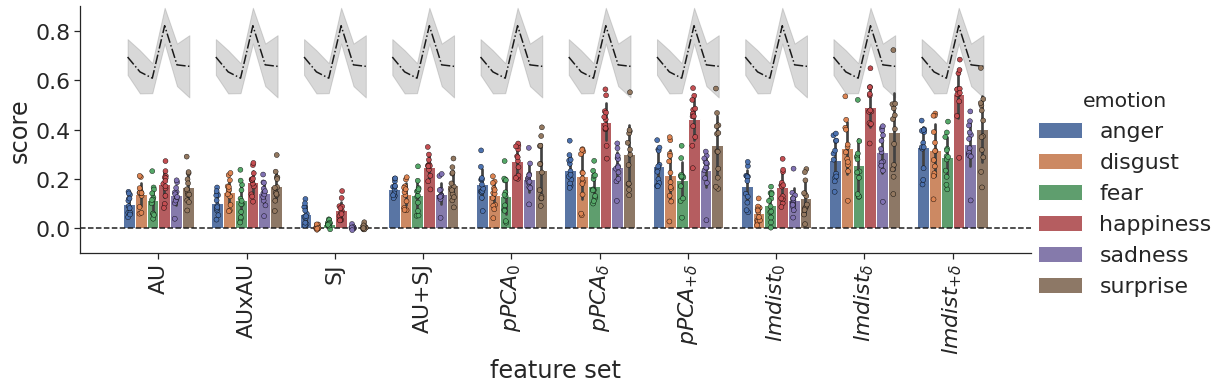

In [13]:
df_within = pd.read_csv('../results/analysis-within_split-train_scores.tsv', sep='\t', index_col=0)
for old_name, new_name in rename.items():
    df_within.loc[df_within.loc[:, 'feature_set'] == old_name, 'feature_set'] = new_name

df_within = df_within.rename({"feature_set": "feature set"}, axis=1)
df_within = df_within.sort_values(['feature set', 'emotion'], axis=0)

n_fs = len(order_fs)
n_emo = 6

g = sns.catplot(
    x='feature set', y='score', data=df_within, hue='emotion',
    kind="bar", aspect=3, height=5, ci='sd', order=order_fs
)
g.set_xticklabels(rotation=90)

sns.stripplot(
    x='feature set', y='score', hue='emotion', order=order_fs,
    edgecolor='black', linewidth=0.4, data=df_within,
    dodge=True, jitter=True
)

for i in range(n_fs):
    plt.plot(np.linspace(i-0.35, i+0.35, num=n_emo), ns_within_av, c='k', ls='-.')
    plt.fill_between(
        np.linspace(i-0.35, i+0.35, num=n_emo),
        ns_within_av - ns_within_std, ns_within_av + ns_within_std,
        color='gray', alpha=0.3
)

ax = plt.gca()
ax.set_ylim(ymin, ymax)
ax.axhline(chance_level, c='k', ls='--')
ax.legend_.remove()

Hue and x-axis reversed:

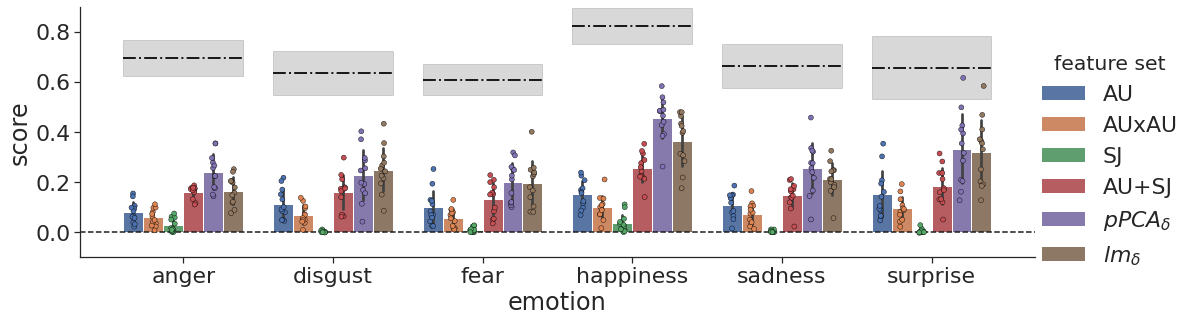

In [564]:
sns.catplot(
    x='emotion', y='score', data=df_within, hue='feature set',
    kind="bar", aspect=3, height=5, ci='sd', hue_order=order_fs
)

sns.stripplot(
    x='emotion', y='score', hue='feature set',
    edgecolor='black', linewidth=0.4, data=df_within,
    dodge=True, jitter=True, hue_order=order_fs
)

for i, (av, std) in enumerate(zip(ns_within_av, ns_within_std)):
    plt.plot([i-0.4, i+0.4], [av, av], lw=2, ls='-.', c='k')
    plt.fill_between(
        [i-0.4, i+0.4],
        av - std, av + std,
        color='gray', alpha=0.3
    )

ax = plt.gca()
ax.axhline(chance_level, c='k', ls='--')
ax.set_ylim(ymin, ymax)
ax.legend_.remove()

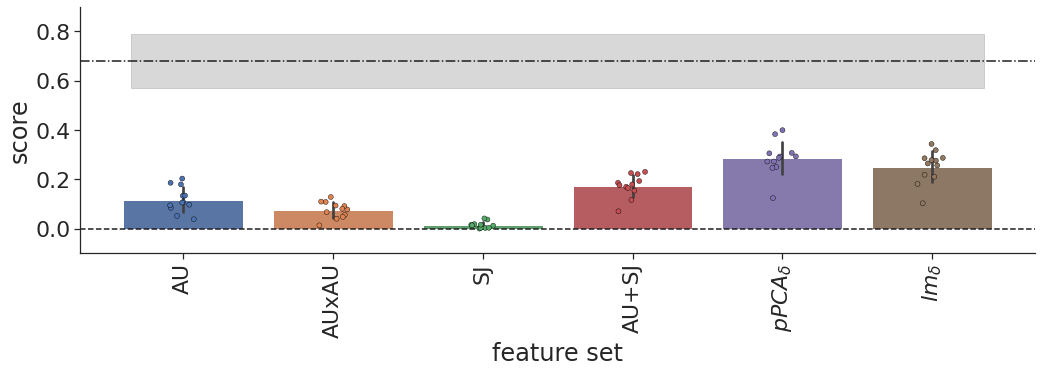

In [565]:
tmp = df_within.groupby(['feature set', 'sub']).mean().reset_index()

g = sns.catplot(
    x='feature set', y='score', data=tmp,
    kind="bar", aspect=3, height=5, ci='sd', order=order_fs
)
g.set_xticklabels(rotation=90)

sns.stripplot(
    x='feature set', y='score', order=order_fs,
    edgecolor='black', linewidth=0.4, data=tmp,
    dodge=True, jitter=True
)

plt.axhline(ns_within_av.mean(), ls='-.', c='k')
plt.fill_between(
    np.linspace(-0.35, n_fs - 1 + 0.35, num=n_fs),
    ns_within_av.mean() - np.std(ns_within.values),
    ns_within_av.mean() + np.std(ns_within.values),
    color='gray', alpha=0.3
)

plt.ylim(ymin, ymax)
plt.axhline(chance_level, ls='--', c='k');

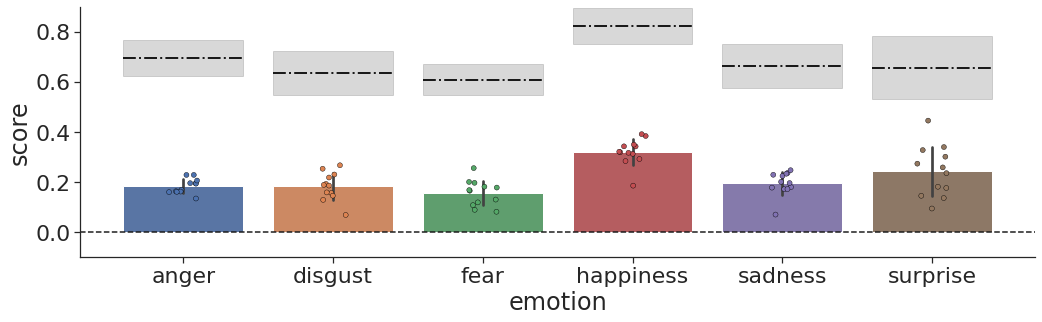

In [567]:
tmp = df_within.groupby(['emotion', 'sub']).mean().reset_index()
order_emo = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']

sns.catplot(
    x='emotion', y='score', data=tmp,
    kind="bar", aspect=3, height=5, ci='sd', order=order_emo
)

sns.stripplot(
    x='emotion', y='score', order=order_emo,
    edgecolor='black', linewidth=0.4, data=tmp,
    dodge=True, jitter=True
)

for i, (av, std) in enumerate(zip(ns_within_av, ns_within_std)):
    plt.plot([i-0.4, i+0.4], [av, av], lw=2, ls='-.', c='k')
    plt.fill_between(
        [i-0.4, i+0.4],
        av - std, av + std,
        color='gray', alpha=0.3
    )

plt.ylim(ymin, ymax);
plt.axhline(chance_level, ls='--', c='k')

# Between-subject analysis
We can do the same thing, but pool the data across subjects and predict the ratings from a left-out subject.

In [568]:
df_between = pd.read_csv('../results/analysis-between_split-train_scores.tsv', sep='\t', index_col=0).query("feature_set != 'nuisance'")
for old_name, new_name in rename.items():
    df_between.loc[df_between.loc[:, 'feature_set'] == old_name, 'feature_set'] = new_name

df_between = df_between.rename({'feature_set': 'feature set'}, axis=1)

g = sns.catplot(
    x='feature set', y='score', hue='emotion', kind="bar", 
    data=df_between, aspect=3, height=5, ci=None, order=order_fs
)
g.set_xticklabels(rotation=25)

for i in range(n_fs):
    plt.plot(np.linspace(i-0.35, i+0.35, num=n_emo), ns_between, ls='-.', c='k')

for i in range(n_fs):
    plt.plot(np.linspace(i-0.35, i+0.35, num=n_emo), ns_within_av, c='k', ls='-.')
    plt.fill_between(
        np.linspace(i-0.35, i+0.35, num=n_emo),
        ns_within_av - ns_within_std, ns_within_av + ns_within_std,
        color='gray', alpha=0.3
)

ax = plt.gca()
ax.set_ylim(ymin, ymax)
ax.axhline(chance_level, c='k', ls='--');

FileNotFoundError: [Errno 2] File ../results/analysis-between_split-train_scores.tsv does not exist: '../results/analysis-between_split-train_scores.tsv'

Hue and x-axis reversed.

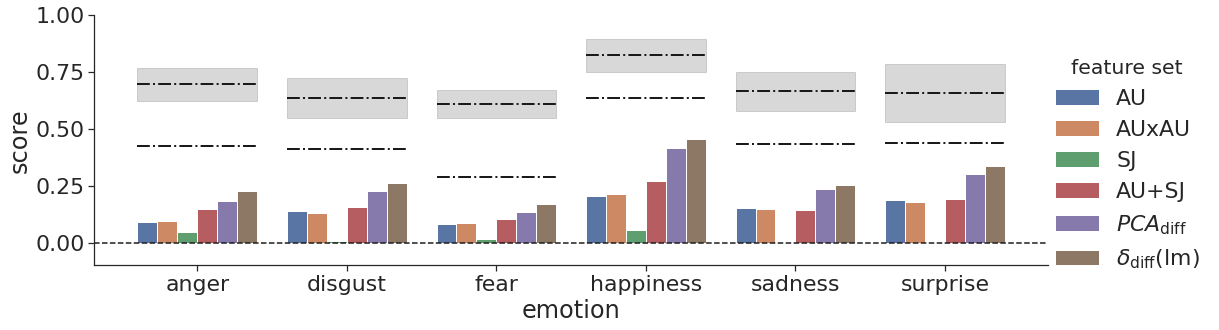

In [104]:
sns.catplot(
    x='emotion', y='score', hue='feature set', kind="bar", 
    data=df_between, aspect=3, height=5, ci='sd', hue_order=order_fs
)

for i, ns in enumerate(ns_between):
    plt.plot([i-0.4, i+0.4], [ns, ns], lw=2, ls='-.', c='k')

for i, (av, std) in enumerate(zip(ns_within_av, ns_within_std)):
    plt.plot([i-0.4, i+0.4], [av, av], lw=2, ls='-.', c='k')
    plt.fill_between(
        [i-0.4, i+0.4],
        av - std, av + std,
        color='gray', alpha=0.3
    )

ax = plt.gca()
ax.set_ylim(ymin, ymax)
ax.axhline(chance_level, c='k', ls='--');

Difference.

Text(107.73475370370375, 0.5, 'Score (within - between)')

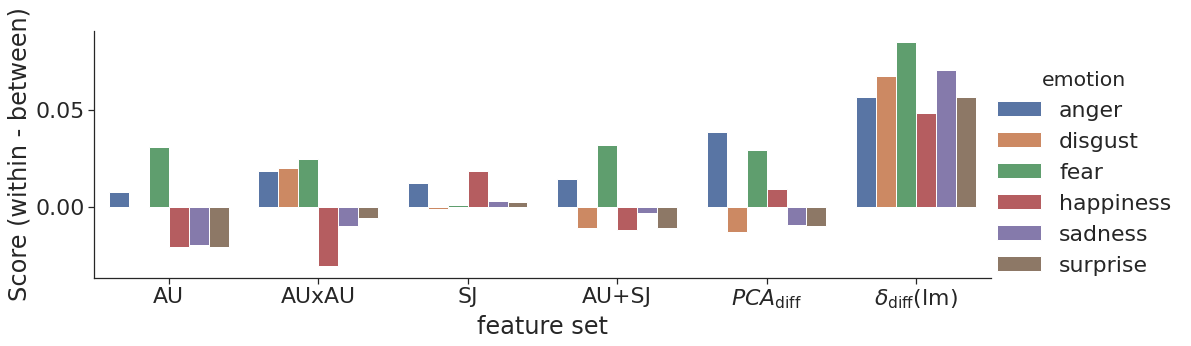

In [106]:
df_w_tmp = df_within.groupby(['emotion', 'feature set']).mean().reset_index().sort_values(['feature set', 'emotion'])
df_b_tmp = df_between.groupby(['emotion', 'feature set']).mean().reset_index().sort_values(['feature set', 'emotion'])
df_diff = df_w_tmp.copy()

df_diff['score'] = df_w_tmp.score.values - df_b_tmp.score.values

sns.catplot(
    x='feature set', y='score', hue='emotion', kind="bar", 
    data=df_diff, aspect=3, height=5, ci=None, order=order_fs
)
plt.ylabel("Score (within - between)")

Text(103.91533751808447, 0.5, 'Score (within - between)')

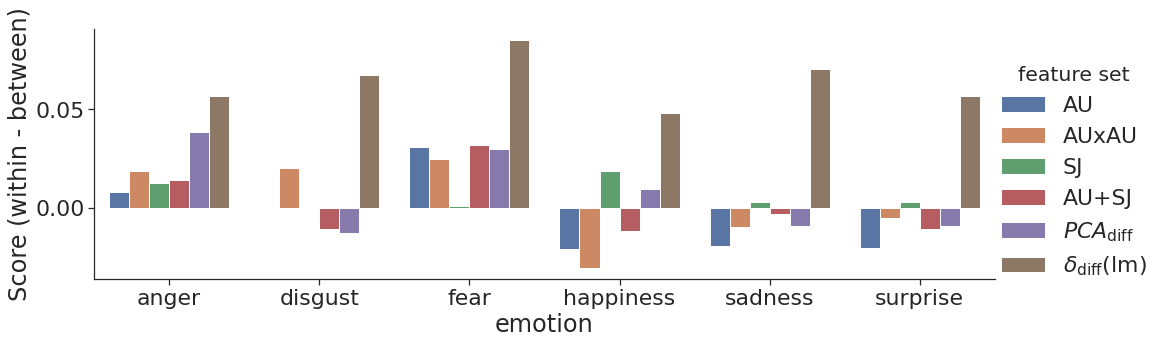

In [107]:
sns.catplot(
    x='emotion', y='score', hue='feature set', kind="bar", 
    data=df_diff, aspect=3, height=5, ci=None, hue_order=order_fs
)
plt.ylabel("Score (within - between)")

## Emotion-recognition API evaluation
How well do the Google and Microsoft (Azure) emotion recognition APIs do relative to our subject ratings?

NameError: name 'ns_between' is not defined

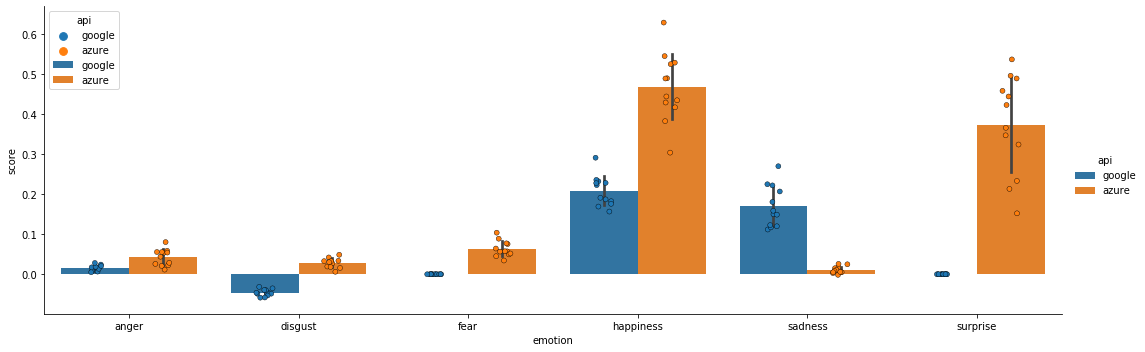

In [2]:
df_api = pd.read_csv('../results/api_ratings_scores.tsv', sep='\t', index_col=0)
sns.catplot(
    x='emotion', y='score', kind="bar", hue='api',
    data=df_api, aspect=3, height=5, ci='sd'
)

sns.stripplot(
    x='emotion', y='score', hue='api',
    edgecolor='black', linewidth=0.4, data=df_api,
    dodge=True, jitter=True
)

for i, ns in enumerate(ns_between):
    plt.plot([i - .4, i + .4], [ns, ns], lw=2, ls='-.', c='k')

for i, (av, std) in enumerate(zip(ns_within_av, ns_within_std)):
    plt.plot([i-0.4, i+0.4], [av, av], lw=2, ls='-.', c='k')
    plt.fill_between(
        [i-0.4, i+0.4],
        av - std, av + std,
        color='gray', alpha=0.3
    )

ax = plt.gca()
ax.set_ylim(ymin, ymax)
ax.axhline(0, ls='--', c='k')
ax.legend_.remove()

In [ ]:
df_concat = pd.concat((df_api.rename({'api': 'feature_set'}, axis=1), df_within), axis=0, sort=True)
sns.catplot(
    x='feature_set', y='score', kind="bar", hue='emotion',
    data=df_concat, aspect=3, height=4, ci='sd'
)

## PCA info

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


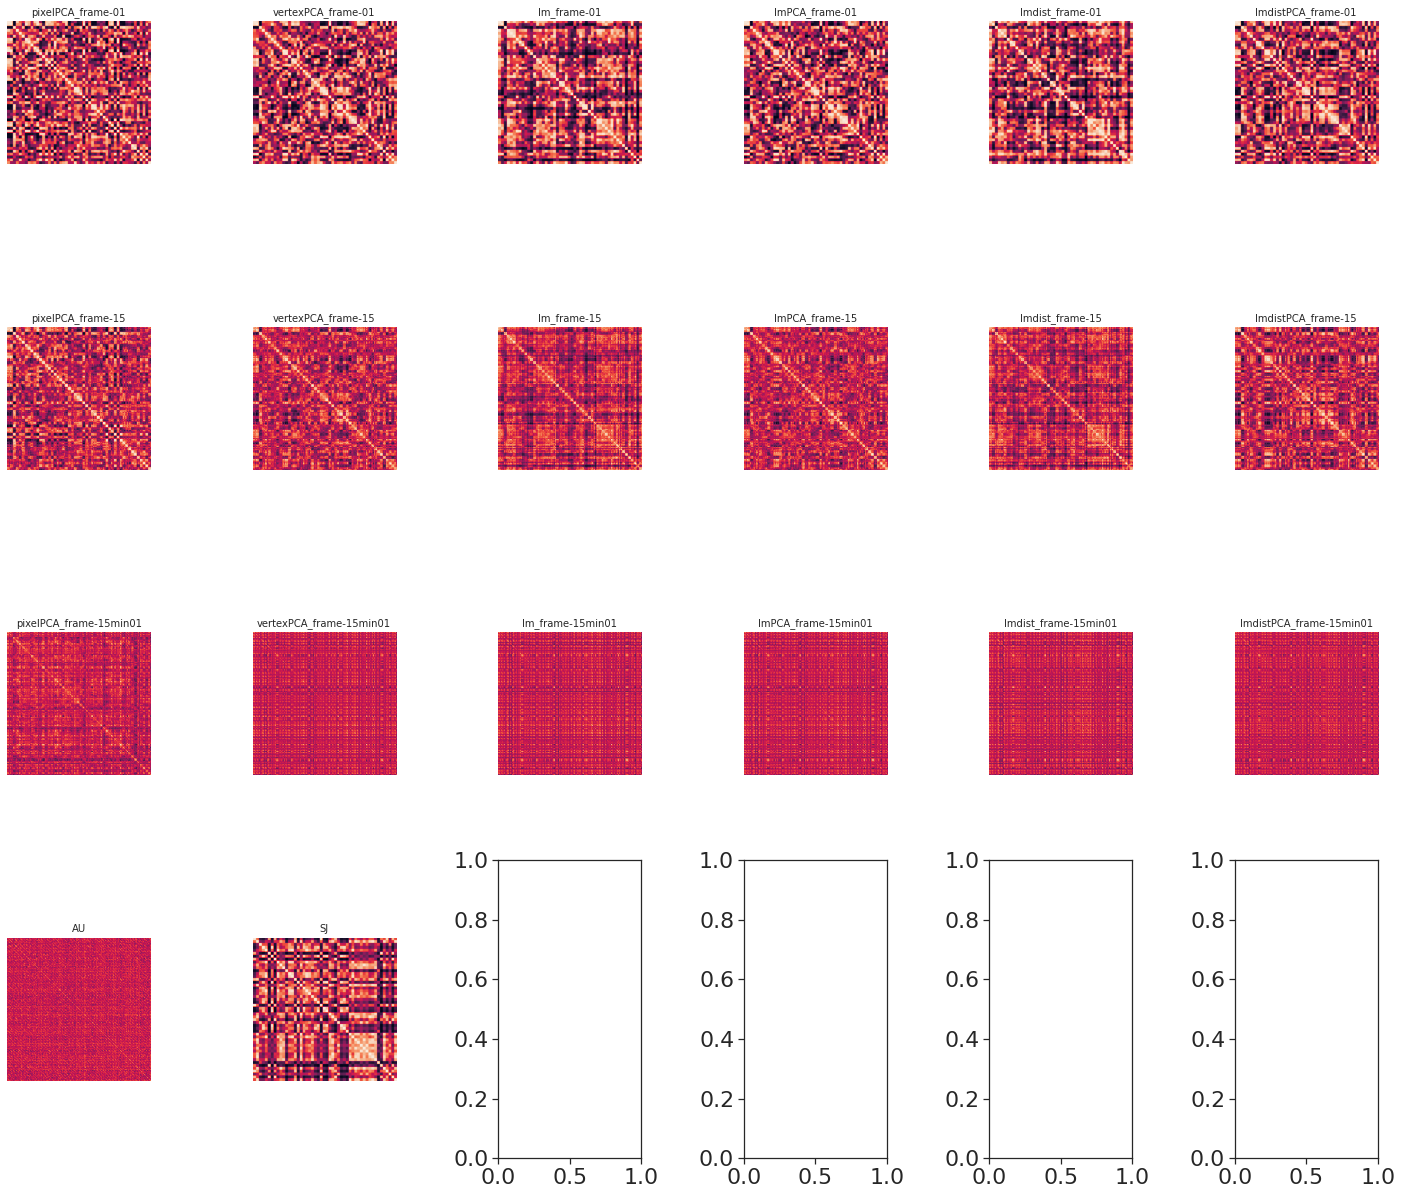

In [518]:
from scipy.stats import rankdata

fs = [
    'pixelPCA_frame-01', 'vertexPCA_frame-01', 'lm_frame-01', 'lmPCA_frame-01', 'lmdist_frame-01', 'lmdistPCA_frame-01',
    'pixelPCA_frame-15', 'vertexPCA_frame-15', 'lm_frame-15', 'lmPCA_frame-15', 'lmdist_frame-15', 'lmdistPCA_frame-15',
    'pixelPCA_frame-15min01', 'vertexPCA_frame-15min01', 'lm_frame-15min01', 'lmPCA_frame-15min01', 'lmdist_frame-15min01', 'lmdistPCA_frame-15min01',
    'AU', 'SJ'
]
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 18))
rdvs = np.zeros((len(fs), 752*751 // 2))
for i, (f, ax) in enumerate(zip(fs, axes.flatten())):
    df = pd.read_csv(f'../data/featurespace-{f}.tsv', sep='\t', index_col=0)
    if f == 'SJ':
        val = df.reset_index().groupby('index').mean().values
    else:
        val = df.values[:, :-1]
        
    val = val.astype(float)

    #if '-01' in f:
    #    val = (val - val.mean(axis=0)) / val.std(axis=0)

    cor = np.corrcoef(val)
    cor[np.isnan(cor)] = 0
    ax.imshow(rankdata(cor).reshape(cor.shape))
    ax.axis('off')
    ax.set_title(f, fontsize=10)
    rdvs[i, :] = cor[np.triu_indices_from(cor, k=1)]
    
fig.tight_layout()

In [553]:
pearsonr(rdvs[19, :], rdvs[12, :])

(0.03617031743794787, 2.2095393956410372e-82)

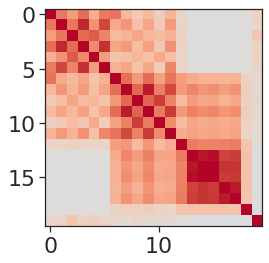

In [522]:
plt.imshow(np.corrcoef(rdvs), vmin=-1, vmax=1, cmap='coolwarm')

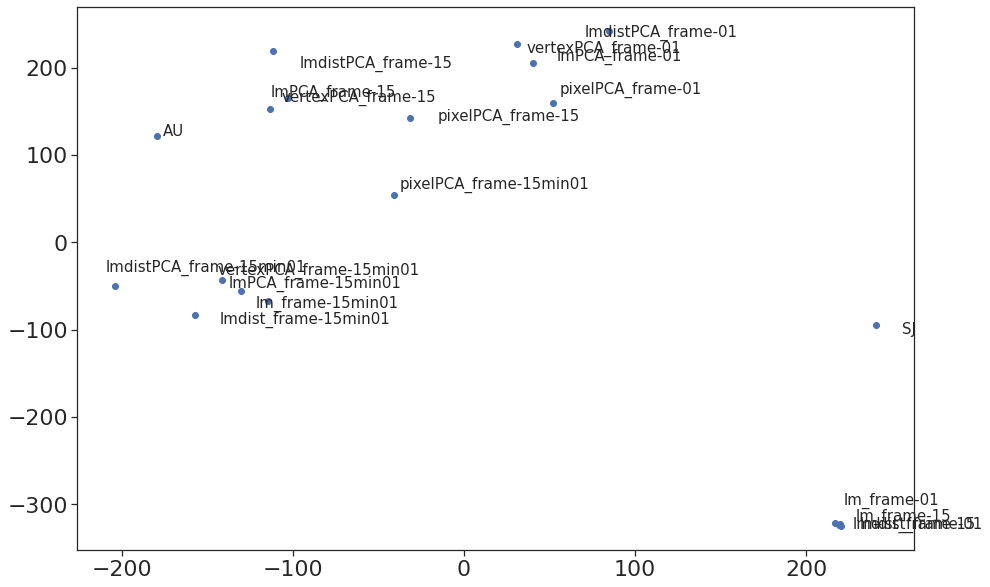

In [524]:
from sklearn.manifold import MDS
mds = MDS()
m = mds.fit_transform(rdvs)
plt.figure(figsize=(15, 10))
plt.scatter(m[:, 0], m[:, 1])
xmax, ymax = m.max(axis=0)
for i, f in enumerate(fs):
    xjit, yjit = np.random.randn(2) * 10
    plt.text(m[i, 0] + xjit, m[i, 1] + yjit, f, fontsize=15)

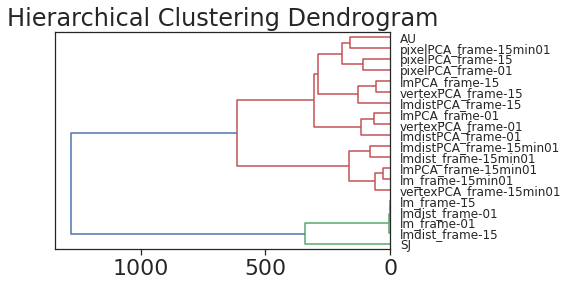

In [544]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs, labels=fs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(rdvs)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode=None, orientation='left')
plt.show()

## PCA visualization

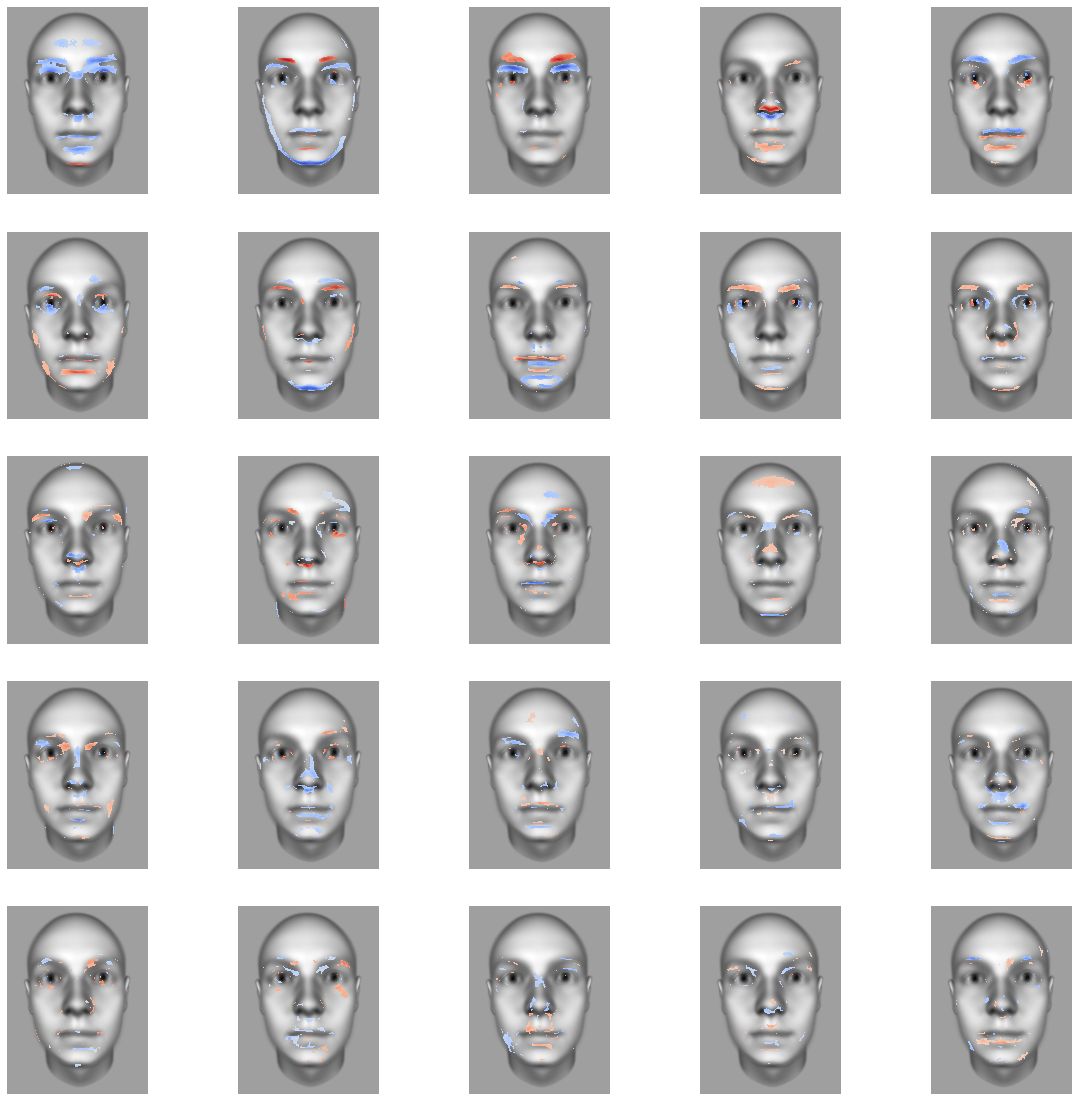

In [339]:
data = np.load('../models/featurespace-pixelPCA_frame-01_weights.npz')
mu = data['mu'].reshape((400, 300))
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(mu, cmap='gray')
    tmp = data['w'][i, :].reshape((400, 300))
    tmp = np.ma.masked_where(np.abs(tmp) < 0.005, tmp)
    ax.imshow(tmp, cmap='coolwarm')
    ax.axis('off')

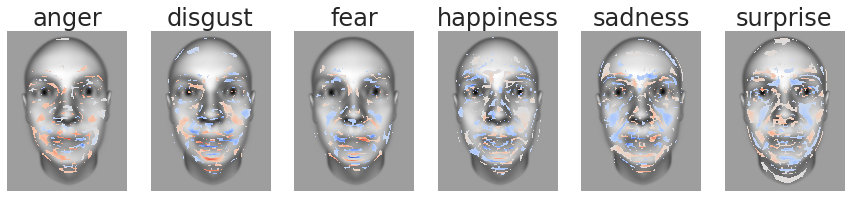

In [343]:
weights = pd.read_csv('../results/analysis-within_split-train_fs-pixelPCA_frame-01_coefs.tsv', sep='\t', index_col=0)
emos = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']
fig, axes = plt.subplots(ncols=len(emos), figsize=(15, 5))
for i, emo in enumerate(emos):
    w = weights.groupby('emotion').mean().iloc[i, :-1].values[np.newaxis, :]
    tmp = (w @ data['w']).squeeze().reshape((400, 300))
    tmp = np.ma.masked_where(np.abs(tmp) < 0.001, tmp)
    axes[i].imshow(mu, cmap='gray')
    axes[i].imshow(tmp, cmap='coolwarm')
    axes[i].axis('off')
    axes[i].set_title(emos[i])

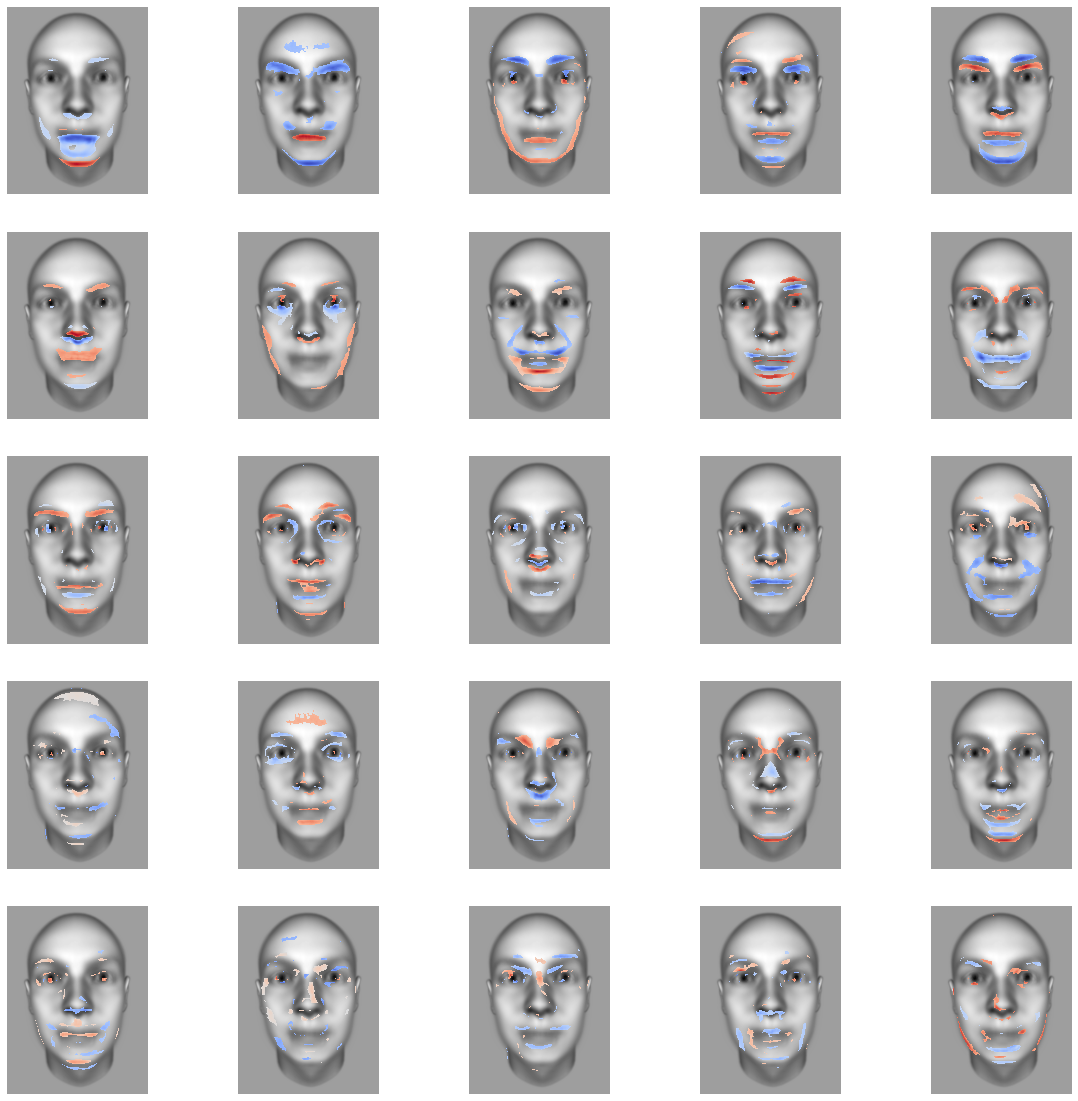

In [345]:
data = np.load('../models/featurespace-pixelPCA_frame-15_weights.npz')
mu = data['mu'].reshape((400, 300))
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(mu, cmap='gray')
    tmp = data['w'][i, :].reshape((400, 300))
    tmp = np.ma.masked_where(np.abs(tmp) < 0.005, tmp)
    ax.imshow(tmp, cmap='coolwarm')
    ax.axis('off')

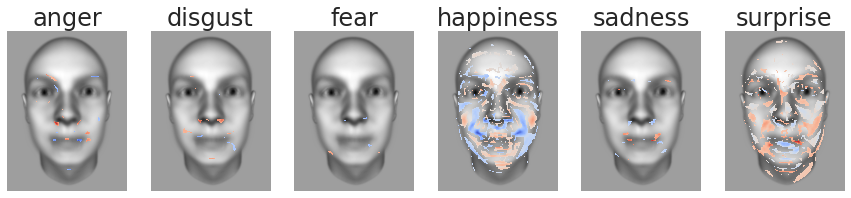

In [347]:
weights = pd.read_csv('../results/analysis-within_split-train_fs-pixelPCA_frame-15_coefs.tsv', sep='\t', index_col=0)
emos = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']
fig, axes = plt.subplots(ncols=len(emos), figsize=(15, 5))
for i, emo in enumerate(emos):
    w = weights.groupby('emotion').mean().iloc[i, :-1].values[np.newaxis, :]
    tmp = (w @ data['w']).squeeze().reshape((400, 300))
    tmp = np.ma.masked_where(np.abs(tmp) < 0.0001, tmp)
    axes[i].imshow(mu, cmap='gray')
    axes[i].imshow(tmp, cmap='coolwarm')
    axes[i].axis('off')
    axes[i].set_title(emos[i])

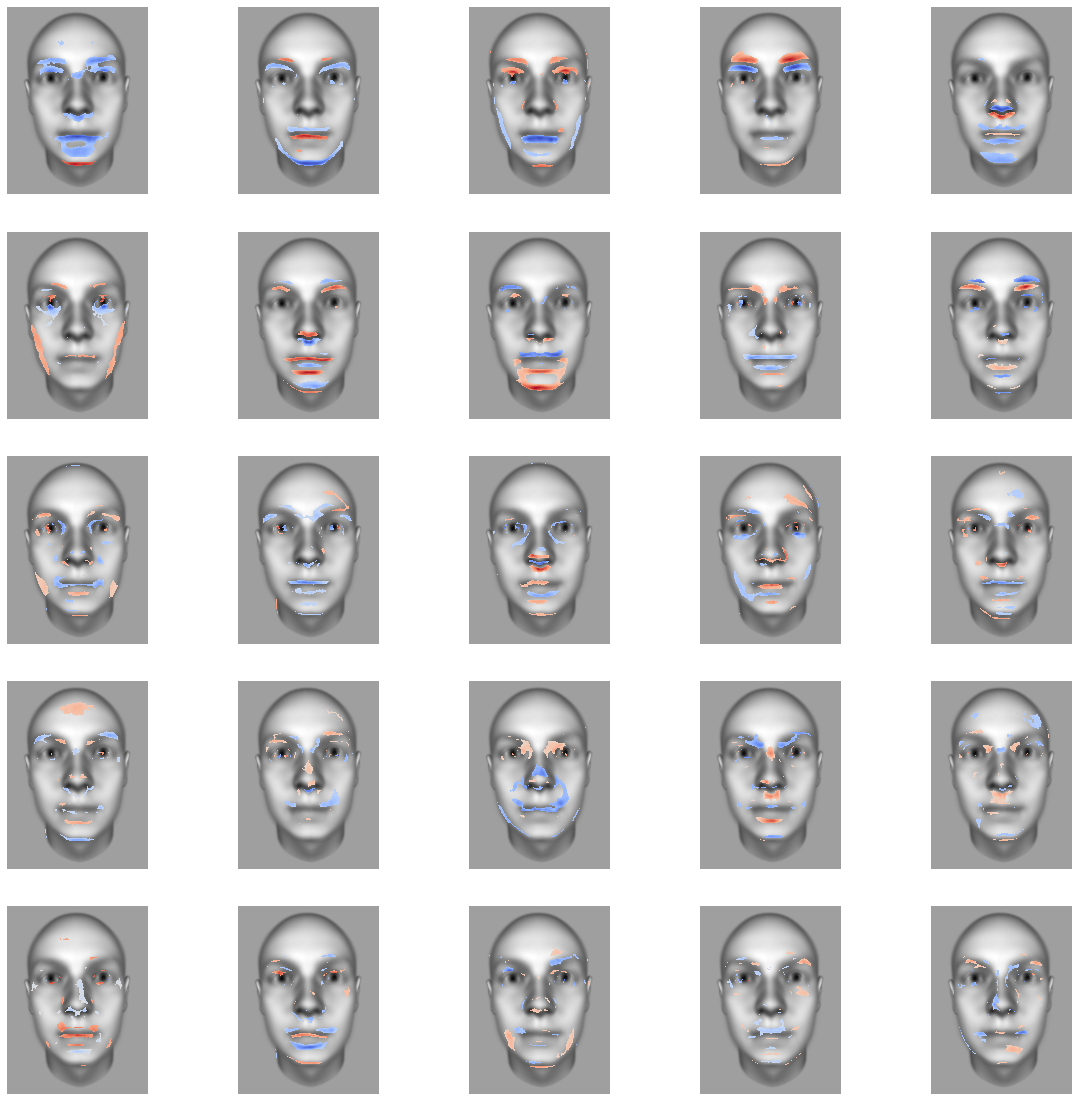

In [397]:
data = np.load('../models/featurespace-pixelPCA_frame-all_weights.npz')
mu = data['mu'].reshape((400, 300))
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(mu, cmap='gray')
    tmp = data['w'][i, :].reshape((400, 300))
    tmp = np.ma.masked_where(np.abs(tmp) < 0.005, tmp)
    ax.imshow(tmp, cmap='coolwarm')
    ax.axis('off')

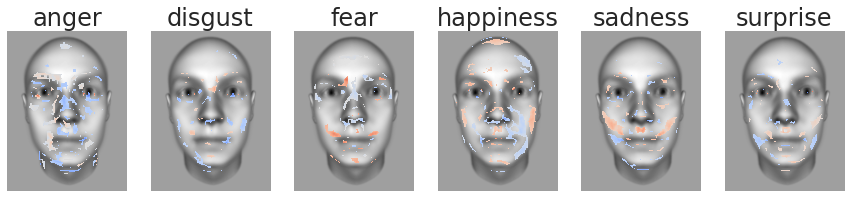

In [399]:
weights = pd.read_csv('../results/analysis-within_split-train_fs-pixelPCA_frame-15min01_coefs.tsv', sep='\t', index_col=0)
emos = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']
fig, axes = plt.subplots(ncols=len(emos), figsize=(15, 5))
for i, emo in enumerate(emos):
    w = weights.groupby('emotion').mean().iloc[i, :-1].values[np.newaxis, :]
    tmp = (w @ data['w']).squeeze().reshape((400, 300))
    tmp = np.ma.masked_where(np.abs(tmp) < 0.001, tmp)
    axes[i].imshow(mu, cmap='gray')
    axes[i].imshow(tmp, cmap='coolwarm')
    axes[i].axis('off')
    axes[i].set_title(emos[i])

## Landmarks

## Vertices

In [351]:
vert = np.load('../data/vertices.npy')

(-78.97436772077641,
 56.050178351047194,
 -108.12458996975676,
 103.25472262463671)

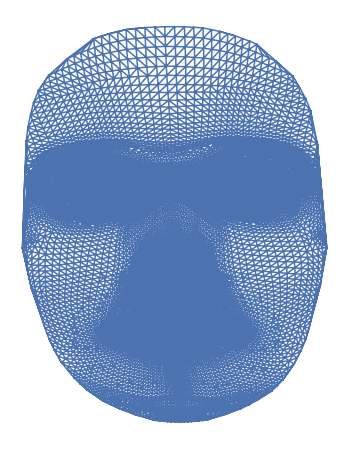

In [395]:
from scipy.spatial import Delaunay
pts = np.mean(vert[:, 0, :, :], axis=0)
idx = pts[:, 2] > 10
pts = pts[idx]
tess = Delaunay(pts[:, :2])
plt.figure(figsize=(6, 8))
plt.triplot(pts[:,0], pts[:,1], tess.simplices.copy())
plt.axis('off')

## Coefficients
Let's look at the coefficients (weights):

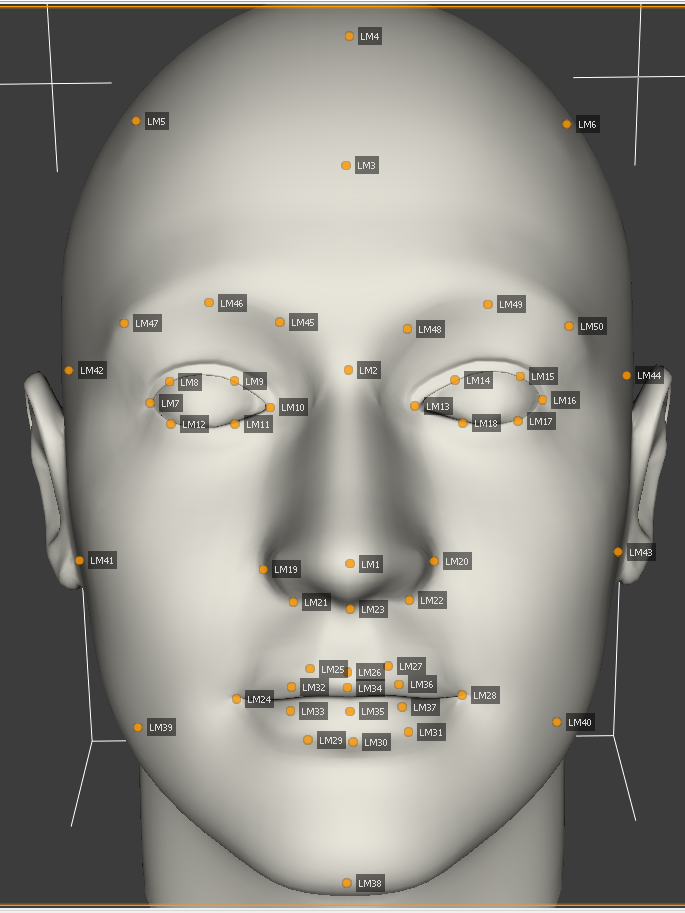

In [ ]:
coef_df = pd.read_csv(f'../../results/analysis-within_split-train_fs-lmdistdiff_coefs.tsv', sep='\t', index_col=0)
tmp = pd.melt(coef_df, id_vars=['emotion', 'sub', 'feature_set'], var_name='feature', value_name='coef')
tmp = tmp.groupby(['emotion', 'feature']).mean().reset_index().loc[:, ['emotion', 'feature', 'coef']]
tmp.loc[tmp.groupby(["emotion"])["coef"].idxmax()] 

In [ ]:
def plot_coefs(fs='AU'):
    coef_df = pd.read_csv(f'../../results/analysis-within_split-train_fs-{fs}_coefs.tsv', sep='\t', index_col=0)
    tmp = pd.melt(coef_df, id_vars=['sub', 'emotion', 'feature_set'], var_name='feature', value_name='coef')
    g = sns.catplot(
        x='feature', y='coef', data=tmp, row='emotion',
        kind="strip", aspect=3, height=5, ci='sd', sharex=False
    )
    for ax in g.axes:
        ax[0].axhline(0., ls='--', c='k')

    plt.tight_layout()

plot_coefs('lmdistf0')

### SJ in depth

In [ ]:
coef_df = pd.read_csv(f'../../results/analysis-main_split-train_fs-SJ_coefs.tsv', sep='\t', index_col=0)
tmp = pd.melt(coef_df, id_vars=['sub', 'emotion', 'feature_set'], var_name='feature', value_name='coef')
tmp = tmp.query("emotion == 'happiness' or emotion == 'anger'")

sns.catplot(
    x='feature', y='coef', data=tmp, hue='emotion',
    kind="bar", aspect=3, height=5, ci='sd', sharex=False
)
sns.stripplot(
    x='feature', y='coef', hue='emotion',
    edgecolor='black', linewidth=0.4, data=tmp,
    dodge=True, jitter=True
)
plt.gca().legend_.remove()

### Circumplex in depth

In [ ]:
coef_df = pd.read_csv(f'../../results/analysis-within_split-train_fs-circumplex_coefs.tsv', sep='\t', index_col=0)
tmp = pd.melt(coef_df, id_vars=['sub', 'emotion', 'feature_set'], var_name='feature', value_name='coef')
#tmp = tmp.query("emotion == 'happiness' or emotion == 'anger'")

order = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']
sns.catplot(
    x='feature', y='coef', data=tmp, hue='emotion', hue_order=order,
    kind="bar", aspect=3, height=5, ci='sd', sharex=False
)
sns.stripplot(
    x='feature', y='coef', hue='emotion', hue_order=order,
    edgecolor='black', linewidth=0.4, data=tmp,
    dodge=True, jitter=True
)
plt.gca().legend_.remove()

In [ ]:
circ_df = pd.read_csv(f'../../results/analysis-main_split-train_fs-circumplex_coefs.tsv', sep='\t', index_col=0)
circ_mean = circ_df.groupby('emotion').mean().reset_index()

plt.figure(figsize=(12, 10))
emos = circ_df['emotion'].unique()
for emo in emos:
    sns.scatterplot(x='arousal', y='valence', data=circ_df.query("emotion == @emo"), alpha=0.5, s=500)
    x, y = circ_df.query("emotion == @emo").mean().loc[['arousal', 'valence']]
    plt.plot([x, x], [y, y], marker='*', ms=40)

plt.axhline(0, ls='--', c='k')
plt.axvline(0, ls='--', c='k')

plt.legend(emos)


## Most important coefs
To chuck out?
* AU13 (not part of any theory, low rank in J&S)
* AU11 (not part of any theory, low rank in J&S)

Cannot throw out:
* AU6 (part of every happiness config)
* AU25 (part of many theories)
* AU17 (often part of sadness theories)
* AU22 (part of disgust/anger)

Include:
* AU23

In [ ]:
coef_df = pd.read_csv(f'../../results/analysis-within_split-train_fs-AU_coefs.tsv', sep='\t', index_col=0)
tmp = pd.melt(coef_df, id_vars=['sub', 'emotion', 'feature_set'], var_name='feature', value_name='coef')
#tmp = tmp.groupby(['emotion', 'feature']).mean().reset_index()
g = sns.catplot(
    x='feature', y='coef', hue='emotion', data=tmp,
    kind="bar", aspect=3, height=5, ci=60,
)

## Decomposition weights

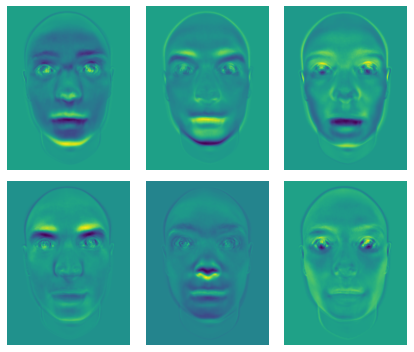

In [9]:
pca_weights = np.load('../data/featurespace-PCA_weights.npy')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 5))
for i, ax in enumerate(axes.flatten()):
    img = pca_weights[i, :].reshape((400, 300))
    ax.imshow(img)
    ax.axis('off')
    
fig.tight_layout()

In [ ]:
pca_coefs = pd.read_csv(f'../../results/analysis-within_split-train_fs-pca14min0_coefs.tsv', sep='\t', index_col=0)
pca_weights = np.load('../../data/featurespace-pca_weights.npy')

mean_pca = pca_coefs.drop('sub', axis=1).groupby('emotion').mean().reset_index()
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(15, 8))
for i, ax in enumerate(axes.flatten()):
    emo = mean_pca.loc[i, 'emotion']
    coefs = mean_pca.iloc[i, 1:].values
    idx = np.argsort(mean_pca.query(f"emotion == '{emo}'").drop('emotion', axis=1).values.squeeze())[-5:]
    img = coefs[idx] @ pca_weights[idx, :]
    ax.imshow(img.reshape((80, 60)).astype(float), cmap='viridis')
    ax.set_title(emo)
    ax.axis('off')